In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
#print(cities)

621

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)

    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | kadnikov
Processing Record 11 of Set 1 | auki
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | port hedland
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | lolua
City not found. Skipping...
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | hofn
Processing Record 22 of Set 1 | av

Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 42 of Set 4 | anchorage
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | kununurra
Processing Record 45 of Set 4 | kaitangata
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | dhamrai
Processing Record 48 of Set 4 | emba
Processing Record 49 of Set 4 | harnosand
Processing Record 50 of Set 4 | bethel
Processing Record 1 of Set 5 | los angeles
Processing Record 2 of Set 5 | marcona
City not found. Skipping...
Processing Record 3 of Set 5 | prenzlau
Processing Record 4 of Set 5 | storslett
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | meulaboh
Processing Record 7 of Set 5 | khaniotis
Processing Record 8 of Set 5 | pangnirtung
Processing Record 9 of Set 5 | monforte de lemos
Processing Record 10 of Set 5 | kawalu
Processing Record 11 of Set 5 | aklavik
Processin

Processing Record 31 of Set 8 | santa catalina
Processing Record 32 of Set 8 | nosy varika
Processing Record 33 of Set 8 | new iberia
Processing Record 34 of Set 8 | chvaletice
Processing Record 35 of Set 8 | nueve de julio
Processing Record 36 of Set 8 | jamkhed
Processing Record 37 of Set 8 | sioux lookout
Processing Record 38 of Set 8 | chapais
Processing Record 39 of Set 8 | ostersund
Processing Record 40 of Set 8 | campbellton
Processing Record 41 of Set 8 | ambilobe
Processing Record 42 of Set 8 | bereda
Processing Record 43 of Set 8 | morant bay
Processing Record 44 of Set 8 | ribeira grande
Processing Record 45 of Set 8 | shasta lake
Processing Record 46 of Set 8 | berbera
Processing Record 47 of Set 8 | nerchinskiy zavod
Processing Record 48 of Set 8 | claymont
Processing Record 49 of Set 8 | novomikhaylovskiy
Processing Record 50 of Set 8 | sola
Processing Record 1 of Set 9 | sinnamary
Processing Record 2 of Set 9 | los llanos de aridane
Processing Record 3 of Set 9 | sur
Pro

Processing Record 16 of Set 12 | muli
Processing Record 17 of Set 12 | akureyri
Processing Record 18 of Set 12 | ixtapa
Processing Record 19 of Set 12 | tamazulapam
City not found. Skipping...
Processing Record 20 of Set 12 | el astillero
Processing Record 21 of Set 12 | marinette
Processing Record 22 of Set 12 | pombas
Processing Record 23 of Set 12 | aykhal
Processing Record 24 of Set 12 | maneadero
Processing Record 25 of Set 12 | egvekinot
Processing Record 26 of Set 12 | umm durman
City not found. Skipping...
Processing Record 27 of Set 12 | tsaratanana
Processing Record 28 of Set 12 | singaparna
Processing Record 29 of Set 12 | nanortalik
Processing Record 30 of Set 12 | delijan
Processing Record 31 of Set 12 | coihaique
Processing Record 32 of Set 12 | peterhead
Processing Record 33 of Set 12 | rungata
City not found. Skipping...
Processing Record 34 of Set 12 | dauphin
Processing Record 35 of Set 12 | huallanca
Processing Record 36 of Set 12 | khandyga
Processing Record 37 of S

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2022-07-20 20:19:06,60.9167,-46.0500,57.42,83,91,2.91
1,Punta Arenas,CL,2022-07-20 20:17:42,-53.1500,-70.9167,35.62,86,75,21.85
2,Bredasdorp,ZA,2022-07-20 20:19:07,-34.5322,20.0403,46.60,86,1,5.19
3,Tasiilaq,GL,2022-07-20 20:18:15,65.6145,-37.6368,44.76,81,43,0.63
4,Saldanha,ZA,2022-07-20 20:19:07,-33.0117,17.9442,41.05,62,0,12.68
5,Katsuura,JP,2022-07-20 20:19:08,35.1333,140.3000,76.80,83,80,7.81
6,Cape Town,ZA,2022-07-20 20:16:19,-33.9258,18.4232,53.11,65,0,3.44
7,Rikitea,PF,2022-07-20 20:19:08,-23.1203,-134.9692,73.36,75,0,2.04
8,Esperance,AU,2022-07-20 20:19:09,-33.8667,121.9000,61.63,51,100,17.31
9,Kadnikov,RU,2022-07-20 20:19:09,59.5022,40.3380,52.83,98,29,7.47


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658349369.565071

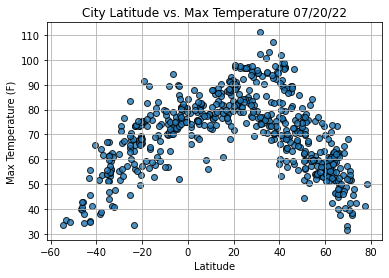

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

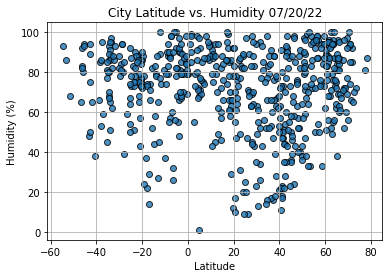

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


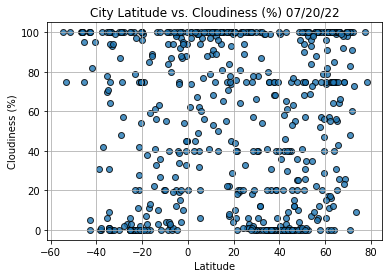

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


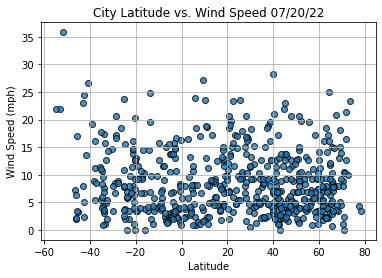

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

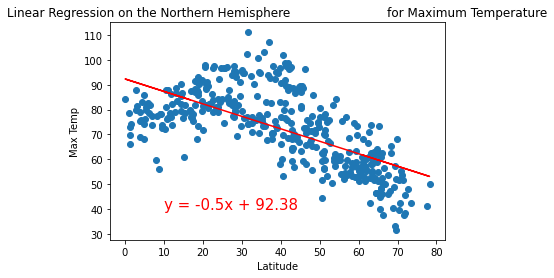

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

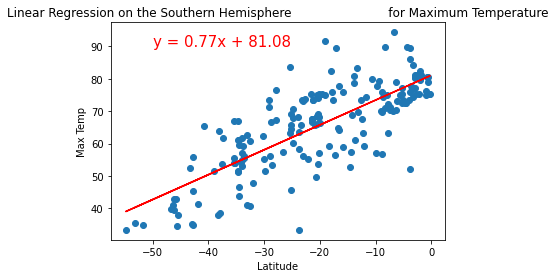

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

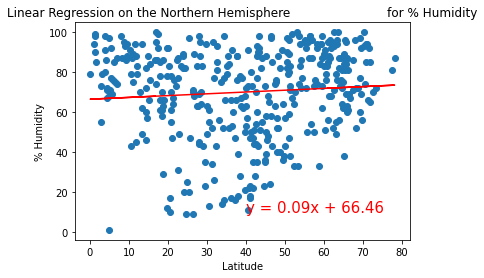

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

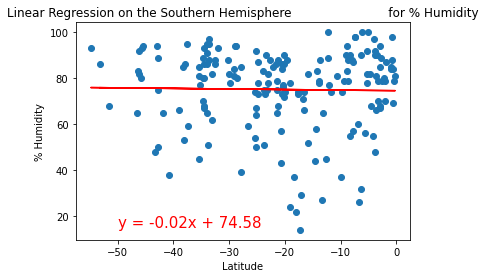

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

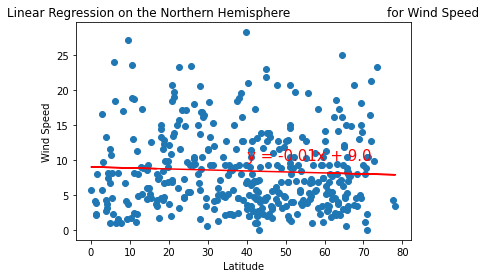

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

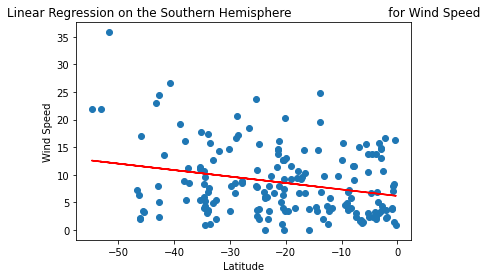

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

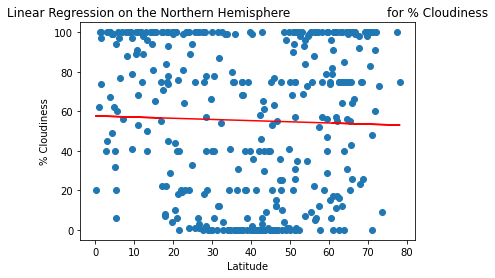

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

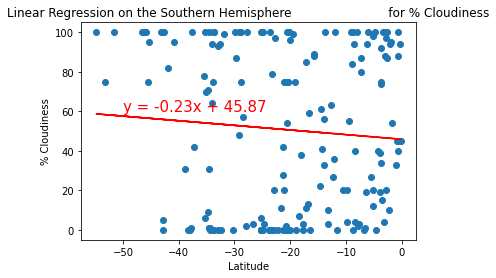

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

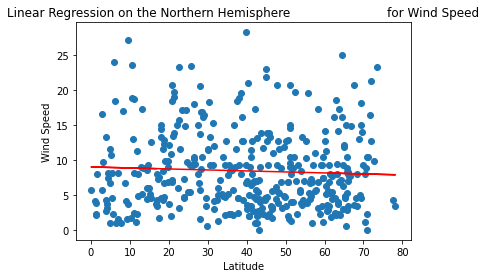

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

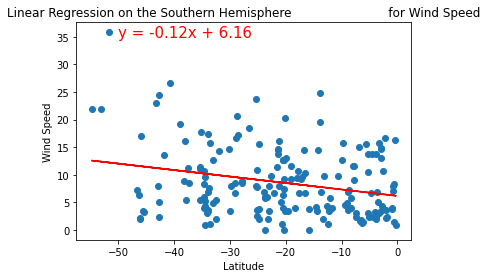

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))